# Machine Learning Part 2 - Problems

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  <br>
**Last updated:** September 2021  
**Python version:** Python 3.6+     
**Recommended environment: `researchPython`**

In [1]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Introduction</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Make sure to open up the respective tutorial notebook(s)! <br> That is what you are expected to use as primary reference material. </span>
</div>

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


3) [`NLP_Notebook.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/Python_NLP_Tutorial/blob/master/NLP_Notebook.ipynb)  

## Import required packages

In [2]:
import os, sys
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [3]:
import spacy
nlp = spacy.load('en_core_web_lg', disable=['Tokenizer', 'Tagger', 'DependencyParser', 
                                       'EntityRecognizer', 'TextCategorizer']) ## <-- to speed things up
#nlp = spacy.load("en_core_web_lg")

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

The `pyLDAvis` package will throw a lot of depreciation warnings, these are safe to ignore for now so the code below will surpress them:

In [6]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 1: LDA with text data</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 15px; font-weight:bold;'> Note: feel free to add as many cells as you'd like to answer these problems, you don't have to fit it all in one cell. </span>
</div>

## 2a) Load MD&A files

I have included a random selection of 20 pre-processed MDA filings in the `data > MDA_files` folder. The filename is the unique identifier.   

You will also find a file called `MDA_META_DF.xlsx` in the "data" folder, this contains the following meta-data for eaching MD&A: 
* filing date  
* cik   
* company name  
* link to filing

----
### 2a - i) Load data into a dictionary with as key the filename and as value the content of the text file

The files should all be in the following folder:  
```
Path.cwd() / 'data' / 'MDA_files'
```

It should look like this:

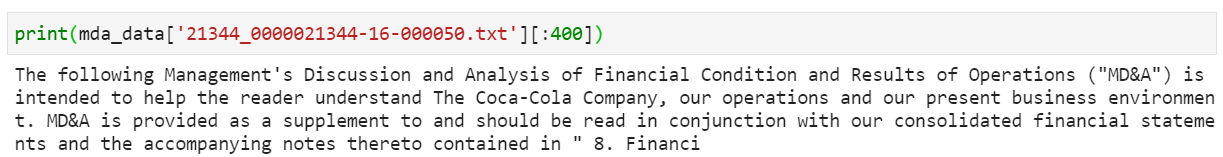

----
### 2a - ii) Split the data up into sentences using spacy  

**Note 1:** Make sure the sentence is stored as a `str` and not a spacy object. You can convert it using `str(...)`.     

**Note 2:** This will take a couple minutes so TQDM is your friend. :)

You want to end up with a dataframe that looks something like this:
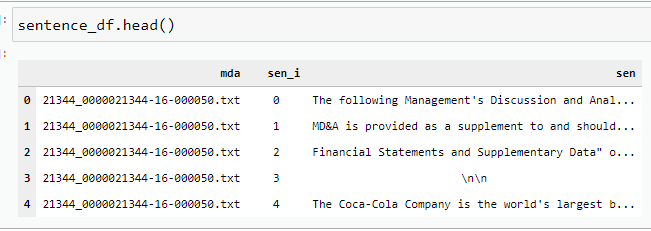

-----
### 2a - iii) Remove sentences from your dataframe that are shorter than 50 characters

**Hint 1:** it is easiest to do this using Pandas and your dataframe.

You should end up with around ~16,000 sentences.

**Important:** To avoid issues later, make sure you reset your index after limiting your sample! See below:

Run this **after** you limit your sample:

```python
sentence_df = sentence_df.reset_index(drop=True)
```

----
## 2b) Latent Dirichilet Allocation model
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### 2b - i) Convert the textual data to numerical using `CountVectorizer`  

Use the following parameters:

1. strip unice accents  
2. lowercase only  
3. Remove stopwords
4. Max_df to 0.8

**Note:** make sure you run this at the sentence level

----
### 2b - ii) Train an LDA model with 10 topics  

This will take a little while to complete, so a good time to stretch your lags and grab something to drink. :) 

**Tip:** you can use the parameter `n_jobs=-1` to use all the available threads in your machine, instead of just one. This might speed up the training.

-----
### 2c - iii) Show the top 10 words for each topic   
You should end up with something like this:

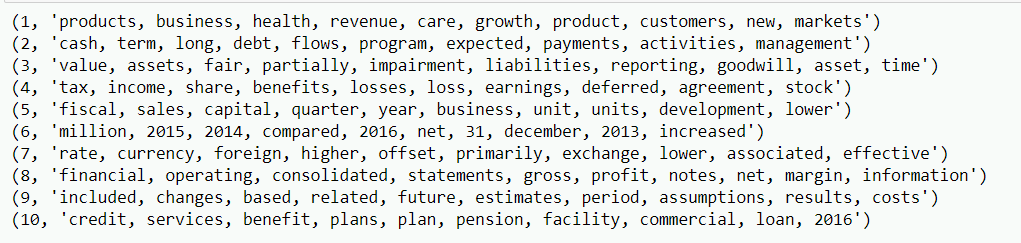

-----
### 2c - iiii) Use `pyLDAvis` to visualize the LDA model  

https://github.com/bmabey/pyLDAvis

`pyLDAvis` is not yet fully optimized for this version of Python and Jupyter Lab so I'd recommend to only import it when you have to:

```python
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
```

You should see something like this:

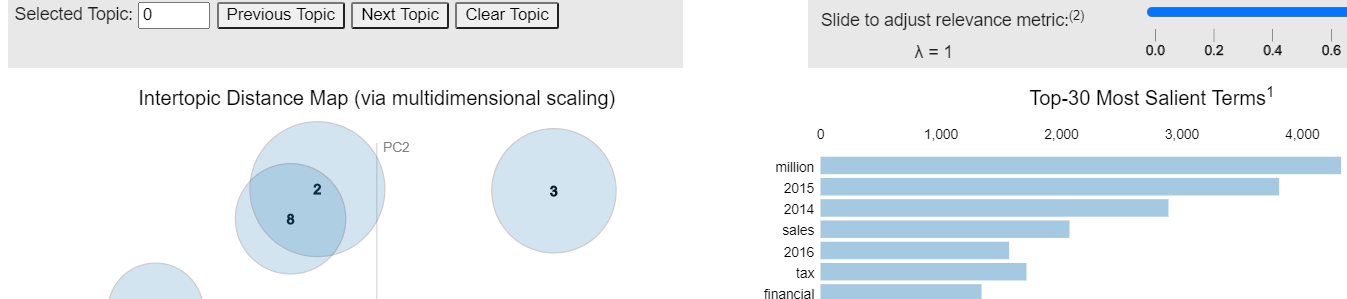

In [34]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

----
### 2c - v) Find a good LDA model to represent MD&A sentences   

Use what you learned above to find a good LDA model. You can tweak:

1. The parameters in `countvectorizer`  
2. The number of topics  

Make sure to include a pyLDAvis illustration.

----
### 2c - vi) Add the topic probabilities back into the sentence_df

You should end up with something like this:  

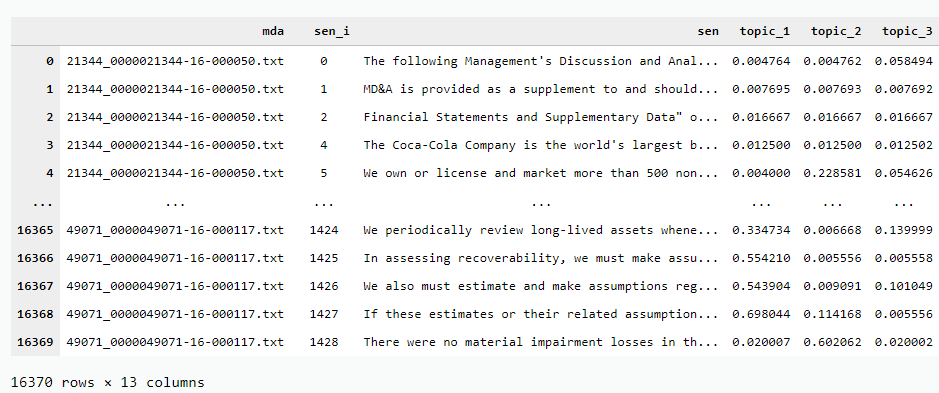

----
### 2c - vi) Add a column to `sentence_df` which indicates the topic with the largest probability

**Hint:** you can return the column name of the max value by using `.idxmax` instead of `.max`